In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mash_copy import MASH
from mash_kasra import MASHMD
from sampler import sample_bloch, sample_p
from electron_transfer import ElectronTransfer
from polylib.PES.nonadiabatic import AdiabaticRepresentation
from polylib import units


In [2]:
pes = ElectronTransfer(1,0,1,1,1)
adiab = AdiabaticRepresentation(pes)
xs = np.linspace(-5, 5, 100)
Vs_diab = np.array([pes.potential(x) for x in xs])
Vs_adiab = np.array([adiab.potential(x) for x in xs])

In [2]:
# t_total = 150e-15 / units.atomic.time 
dt = 0.1
steps = 100

dt1 = 0.1
steps1 = 50

m = 1
num_samples = 20
WPP_list = []  # List to store weights for each iteration

x = []
p = []
S = []
e = []

x2 = []
p2 = []
S2 = []
e2 = []

x3 = []
p3 = []
S3 = []
e3 = []

x4 = []
p4 = []
S4 = []
e4 = []

for i in range(num_samples):
    
    x_init = -1
    # p_init = sample_p(0.1,np.sqrt(2*m*0.1))

    p_init = 3
    S_init =sample_bloch()
    #S_init = np.array([0.2, 0.3, -0.5])
   
    S_init /= np.linalg.norm(S_init) # normalise because numerical method
   
    
    V = adiab.potential(x_init)
    Vz = (V[1] - V[0]) / 2
    Vbar = (V[1] + V[0]) / 2

    e_init = p_init**2/(2*m) + Vbar + Vz*np.sign(S_init[2])

    
    # masher = MASHMD(adiab, dt, bisect=0, sym=True)
    masher = MASH(adiab, dt, m, bisect=10)
    masher.set_xpS(x_init, p_init, S_init, e_init)
    WPP = 2 * np.abs(S_init[2])  # Weighting factor for histogram
    # calculates forward and reverse trajectory using symmetric method
    xts, pts, Sts, ets = masher.trajectory(steps, 'symmetric',dt)
    # xts, pts, Sts = masher.path(steps)
    x.append(xts)
    p.append(pts)
    S.append(Sts)
    e.append(ets)

    # masher2 = MASH(adiab, dt, m, bisect=0)
    # # masher2 = MASHMD(adiab, dt, bisect=10, sym=True)
    # masher2.set_xpS(x_init, p_init, S_init, e_init)
    # # masher2.set_xpS(x_init, p_init, S_init)
    # xts2, pts2, Sts2, ets2 = masher2.trajectory(steps, 'symmetric',dt)
    # # xts2, pts2, Sts2 = masher2.path(steps)
    # x2.append(xts2)
    # p2.append(pts2)
    # S2.append(Sts2)
    # e2.append(ets2)

    # # calculates forward and reverse trajectory using asymmetric method      
    masher3 = MASH(adiab, dt, m, bisect=0)
    masher3.set_xpS(x_init, p_init, S_init, e_init)
    WPP = 2 * np.abs(S_init[2])  # Weighting factor for histogram
    xts3, pts3, Sts3, ets3 = masher3.trajectory(steps, 'verlet,spin',dt)
    # xts3, pts3, Sts3, ets3 = masher3.trajectory(steps, 'symmetric',dt)
    x3.append(xts3)
    p3.append(pts3)
    S3.append(Sts3)
    e3.append(ets3)

    # masher4 = MASH(adiab, dt1, m, bisect=0)
    # masher4.set_xpS(x_init, p_init, S_init, e_init)
    # # xts4, pts4, Sts4, ets4 = masher4.trajectory(steps1, 'verlet,spin',dt)
    # xts4, pts4, Sts4, ets4 = masher4.trajectory(steps1, 'symmetric',dt1) # used dt
    # x4.append(xts4)
    # p4.append(pts4)
    # S4.append(Sts4)
    # e4.append(ets4)

x = np.array(x)
p = np.array(p)
S = np.array(S)
e = np.array(e)

# x2 = np.array(x2)
# p2 = np.array(p2)
# S2 = np.array(S2)
# e2 = np.array(e2)

x3 = np.array(x3)
p3 = np.array(p3)
S3 = np.array(S3)
e3 = np.array(e3)

# x4 = np.array(x4)
# p4 = np.array(p4)
# S4 = np.array(S4)
# e4 = np.array(e4)

# e = []
# e2 = []
# for i in range(steps):
#     e.append(p[0, i]**2 / (2 * pes.mass) + adiab.potential(x[0, i])[int(S[0, i, 2] > 0)])
#     e2.append(p2[0, i]**2 / (2 * pes.mass) + adiab.potential(x2[0, i])[int(S2[0, i, 2] > 0)])



# np.savez('symm_tully1_xpS', x=x, p=p, S=S)
# np.savez('symm_tully1_xpS_reverse.npz', x2=x2, p2=p2, S2=S2)

# with np.load('default_tully1_xpS.npz') as f:
#     x = f['x']
#     p = f['p']
#     S = f['S']
p_final = p[:, -1]
# x_final = x[:, -1]
# S_final = S[:,:, -1]
WPP_list = 2 * np.abs(S[:, 0, 2])

'correlation function'


x0_x_i =np.mean( x* x[:,0, None]*2 * np.abs(S[:, 0, 2, None]), axis=0)
p0_p_i = np.mean( p* p[:,0, None]*2 * np.abs(S[:, 0, 2,None]), axis=0)
e0_e_i =np.mean( e* e[:,0, None]*2 * np.abs(S[:, 0, 2,None]), axis=0)

x0_x_i3 =np.mean( x3* x3[:,0, None]*2 * np.abs(S[:, 0, 2, None]), axis=0)
p0_p_i3 = np.mean( p3* p3[:,0, None]*2 * np.abs(S[:, 0, 2,None]), axis=0)
e0_e_i3 =np.mean( e3* e3[:,0, None]*2 * np.abs(S[:, 0, 2,None]), axis=0)
        
    

NameError: name 'sample_bloch' is not defined

In [ ]:
fig = plt.figure()
plt.plot(np.arange(steps)*dt,p.T, color='black', alpha=0.5, label=f'dt={dt:.4f}')
# plt.plot(np.arange(steps)*dt,p2.T, color='red', alpha=0.5, ls='--', label=f'dt = {dt1:.4f}')
plt.ylabel ('p')
plt.title('momentum symmetric method')
plt.legend()

In [ ]:
fig = plt.figure()
plt.plot(np.arange(steps)*dt,S[:, :, 2].T, color='black', alpha=0.5)
# plt.plot(np.arange(steps)*dt,S2[:, :, 2].T, color='red', alpha=0.5, ls='--')
plt.xlabel('time steps')
plt.ylabel('Sz')
plt.title('Spin symmetric method')

In [ ]:
fig = plt.figure()
plt.plot(np.arange(steps)*dt,x.T, color='black', alpha=0.5)
plt.xlabel('time steps')
plt.ylabel('q')
plt.title('q symmetric method')

In [ ]:
fig = plt.figure()
plt.plot(np.arange(steps)*dt, e.T, label='analytic', color='black', alpha=0.5)
plt.ylabel ('energy')
plt.title('energy symmetric method')

In [ ]:
fig = plt.figure()
plt.plot(x0_x_i, label ='symmetric')
plt.plot(x0_x_i3, label ='asymmetric')
plt.legend()

In [ ]:
fig = plt.figure()
plt.plot(p0_p_i, label ='symmetric')
plt.plot(p0_p_i3, label ='asymmetric')
plt.legend()

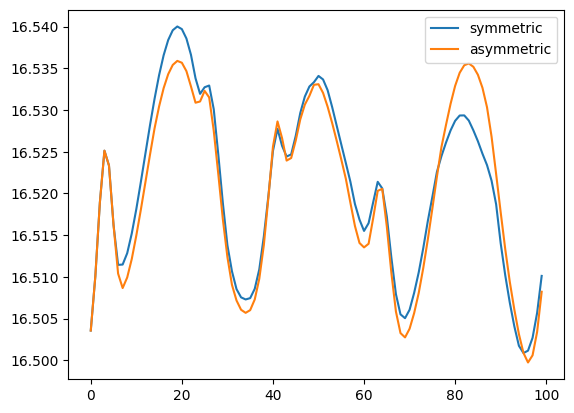

In [14]:
plt.plot(e0_e_i, label ='symmetric')
plt.plot(e0_e_i3, label ='asymmetric')
plt.legend()